## <div align="center"> TUGAS LAB IS794 DEEP LEARNING </div>
### <div align="center"> WEEK [11] : [Deep Learning for Timeseries Data] </div>

#### <div align="center"> Semester Ganjil 2023/2024 </div>

In [1]:
from numpy.ma import outerproduct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [2]:
# Load the stock price dataset
df = pd.read_csv('BBCA.JK.csv')

output = df['Adj Close'].values.reshape(-1, 1)
features = ['Open', 'High', 'Low', 'Volume']

In [3]:
#Scaling
scaler = MinMaxScaler(feature_range=(0,1))
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
scaled_output = scaler.fit_transform(output)
feature_transform.head()

,Open,High,Low,Volume
0,0.958333,0.956522,0.962963,0.282898
1,0.916667,1.000000,0.962963,0.507473
2,0.875000,0.826087,0.851852,0.457543
3,0.750000,0.956522,0.814815,0.388941
4,1.000000,0.956522,1.000000,0.372331


In [4]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error

#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=3) #split into training, validation, and testing set
for train_index, test_index in timesplit.split(feature_transform):
    X_train, X_test = feature_transform[:len(train_index)], feature_transform[len (train_index): (len(train_index)+len(test_index))]
    y_train, y_test = scaled_output[:len(train_index)], scaled_output[len(train_index): (len(train_index)+len(test_index))]
    
    split_index = int(len(train_index)*0.8) #80% as training and 20% as validation.
    X_train, X_val = X_train[:split_index], X_train[split_index:]
    y_train, y_val = y_train[:split_index], y_train[split_index:]

#Process the data for the model
trainX = np.array(X_train)
valX = np.array(X_val)
testX = np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val = valX.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [5]:
#Building the SimpleRNN Model
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(1, len(features))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

#Model Prediction
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print (f'Mean Absolute Error (MAE): {mae:.4f}')

Epoch 1/50
2/2 [==============================] - 1s 245ms/step - loss: 0.2290 - val_loss: 0.0749
Epoch 2/50
2/2 [==============================] - 0s 45ms/step - loss: 0.1853 - val_loss: 0.0588
Epoch 3/50
2/2 [==============================] - 0s 39ms/step - loss: 0.1461 - val_loss: 0.0449
Epoch 4/50
2/2 [==============================] - 0s 26ms/step - loss: 0.1139 - val_loss: 0.0334
Epoch 5/50
2/2 [==============================] - 0s 33ms/step - loss: 0.0853 - val_loss: 0.0243
Epoch 6/50
2/2 [==============================] - 0s 39ms/step - loss: 0.0619 - val_loss: 0.0173
Epoch 7/50
2/2 [==============================] - 0s 31ms/step - loss: 0.0439 - val_loss: 0.0124
Epoch 8/50
2/2 [==============================] - 0s 30ms/step - loss: 0.0297 - val_loss: 0.0092
Epoch 9/50
2/2 [==============================] - 0s 33ms/step - loss: 0.0194 - val_loss: 0.0076
Epoch 10/50
2/2 [==============================] - 0s 39ms/step - loss: 0.0124 - val_loss: 0.0070
Epoch 11/50
2/2 [===========

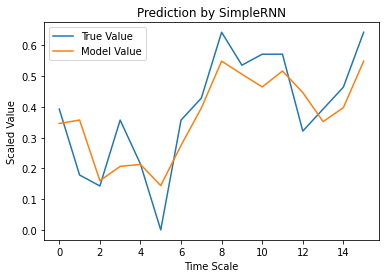

In [6]:
#Predicted vs True Adj Close Value - SimpleRNN
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='Model Value')
plt.title("Prediction by SimpleRNN")
plt.xlabel('Time Scale')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

In [7]:
from tensorflow.keras.layers import LSTM

#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(50, input_shape=(1, len(features)), activation='relu'))
lstm.add(Dense(1))
lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

#Model Prediction
y_pred = lstm.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.4f}')

Epoch 1/50
2/2 [==============================] - 2s 318ms/step - loss: 0.6549 - mean_absolute_error: 0.7906 - val_loss: 0.2666 - val_mean_absolute_error: 0.4869
Epoch 2/50
2/2 [==============================] - 0s 37ms/step - loss: 0.6387 - mean_absolute_error: 0.7804 - val_loss: 0.2591 - val_mean_absolute_error: 0.4793
Epoch 3/50
2/2 [==============================] - 0s 29ms/step - loss: 0.6227 - mean_absolute_error: 0.7704 - val_loss: 0.2518 - val_mean_absolute_error: 0.4719
Epoch 4/50
2/2 [==============================] - 0s 37ms/step - loss: 0.6075 - mean_absolute_error: 0.7606 - val_loss: 0.2447 - val_mean_absolute_error: 0.4645
Epoch 5/50
2/2 [==============================] - 0s 35ms/step - loss: 0.5928 - mean_absolute_error: 0.7510 - val_loss: 0.2377 - val_mean_absolute_error: 0.4571
Epoch 6/50
2/2 [==============================] - 0s 42ms/step - loss: 0.5786 - mean_absolute_error: 0.7418 - val_loss: 0.2308 - val_mean_absolute_error: 0.4497
Epoch 7/50
2/2 [=================

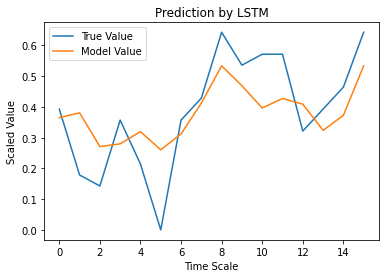

In [8]:
#Predicted vs True Adj Close Value - LSTM 
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='Model Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

In [9]:
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_absolute_error
from keras.layers import Dropout

#Building the LSTM Model
lstm2 = Sequential()
lstm2.add(LSTM(50, input_shape=(1, len(features)), activation='relu'))
lstm2.add(Dropout (0.7))
lstm2.add(Dense (1))
lstm2.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

#Model Prediction
y_pred = lstm2.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.4f}')

Epoch 1/50
2/2 [==============================] - 1s 223ms/step - loss: 0.6925 - val_loss: 0.2759
Epoch 2/50
2/2 [==============================] - 0s 43ms/step - loss: 0.6815 - val_loss: 0.2657
Epoch 3/50
2/2 [==============================] - 0s 34ms/step - loss: 0.6361 - val_loss: 0.2558
Epoch 4/50
2/2 [==============================] - 0s 36ms/step - loss: 0.6344 - val_loss: 0.2463
Epoch 5/50
2/2 [==============================] - 0s 37ms/step - loss: 0.5895 - val_loss: 0.2371
Epoch 6/50
2/2 [==============================] - 0s 28ms/step - loss: 0.5960 - val_loss: 0.2282
Epoch 7/50
2/2 [==============================] - 0s 28ms/step - loss: 0.5744 - val_loss: 0.2195
Epoch 8/50
2/2 [==============================] - 0s 16ms/step - loss: 0.5670 - val_loss: 0.2109
Epoch 9/50
2/2 [==============================] - 0s 54ms/step - loss: 0.5325 - val_loss: 0.2026
Epoch 10/50
2/2 [==============================] - 0s 34ms/step - loss: 0.5189 - val_loss: 0.1944
Epoch 11/50
2/2 [===========

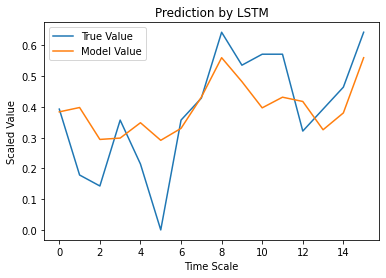

In [10]:
#Predicted vs True Adj Close Value - LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='Model Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

In [11]:
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_absolute_error
from keras.layers import Dropout, Bidirectional

#Building the Bidirectional LSTM Model
lstm3 = Sequential()
lstm3.add(Bidirectional (LSTM(16, input_shape=(1, len (features)), activation='relu')))
lstm3.add(Dense (1))
lstm3.compile(optimizer='adam', loss='mean_squared_error', metrics=["mean_absolute_error"])

# Train the model
lstm3.fit(X_train, y_train, epochs=50, batch_size=32)

#Model Prediction
y_pred = lstm3.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.4f}')

Epoch 1/50
2/2 [==============================] - 3s 4ms/step - loss: 0.7379 - mean_absolute_error: 0.8391
Epoch 2/50
2/2 [==============================] - 0s 5ms/step - loss: 0.7209 - mean_absolute_error: 0.8291
Epoch 3/50
2/2 [==============================] - 0s 5ms/step - loss: 0.7041 - mean_absolute_error: 0.8193
Epoch 4/50
2/2 [==============================] - 0s 6ms/step - loss: 0.6883 - mean_absolute_error: 0.8098
Epoch 5/50
2/2 [==============================] - 0s 6ms/step - loss: 0.6722 - mean_absolute_error: 0.8002
Epoch 6/50
2/2 [==============================] - 0s 5ms/step - loss: 0.6569 - mean_absolute_error: 0.7908
Epoch 7/50
2/2 [==============================] - 0s 5ms/step - loss: 0.6423 - mean_absolute_error: 0.7815
Epoch 8/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6271 - mean_absolute_error: 0.7723
Epoch 9/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6130 - mean_absolute_error: 0.7632
Epoch 10/50
2/2 [====================

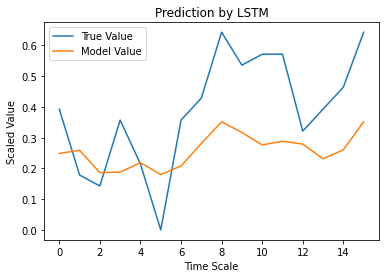

In [12]:
#Predicted vs True Adj Close Value LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='Model Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

### Analyze the results of each model. Record each MAE result in the format as below in your python notebook.

### Percobaan sesuai modul

#### MAE of Model 1 - SimpleRNN
 0.0850

#### MAE of Model 2 - LSTM
 0.3080

#### MAE of Model 3 - - LSTM + Dropout ()
 0.3203

#### MAE of Model 4 - Bidirectional LSTM
 0.3011
 

### 14 Kesimpulan setelah mengulang

Note that the MAE value is likely the same for each model. Why do you think that is? Additionally, try to re-run each model, noting whether the MAE values change. This possibility will happen every time you re-run. How did it happen? Look for references to support your answer, and put your answer in your python notebook.

#### Answer:
Sebenarnya ketiga jenis lstm berhasil MAE sama karena tadi variabel untuk memprediksi belum diganti menjadi masing", yaitu tadi hanya "model" untuk keempat algoritma. Model bidirectional LSTM kurang cocok  untuk memprediksi dataset saham. Ketika kita menjalankan ulang model, bobot seed diinisialisasi lagi, dan jika inisialisasi acak membuat model konvergen ke solusi yang sama, Anda mungkin akan melihat nilai MAE yang sama. Untuk mengatasi hal ini, kita dapat menetapkan seed untuk reprodusibilitas sebelum melatih model. Hal ini memastikan bahwa inisialisasi acak dari bobot adalah sama di seluruh proses yang berbeda.